In [1]:
import pandas as pd
df = pd.read_csv('modelnewvardata.csv', header=0)

In [2]:
df.rename(columns={'Zone.1': 'Frequency'}, inplace  = True)

In [3]:
df.head()

,dayoftheweek,CallHour,Zone,Frequency
0,Weekday,am_peak,X,54
1,Weekday,am_peak,VIII,68
2,Weekday,am_peak,III,28
3,Weekday,am_peak,V,44
4,Weekday,am_peak,IV,24


In [4]:
df['Frequency'].mean()

33.57

In [5]:
df['Frequency'].var()

524.8738383838382

# NEGATIVE BINOMIAL

## STEP 1: Fit the Poisson Regression model on the data set. This will give us the vector of fitted values lambda.

In [6]:
import numpy as np
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print("Testing data length = " + str(len(df_test)))
print("Training data length = " + str(len(df_train)))

Testing data length = 19
Training data length = 81


In [7]:
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [8]:
expr = """Frequency ~ dayoftheweek  + CallHour + Zone"""

In [9]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [10]:
X_train

,Intercept,dayoftheweek[T.Weekend],CallHour[T.evening],CallHour[T.midday],CallHour[T.overnight],CallHour[T.pm_peak],Zone[T.II],Zone[T.III],Zone[T.IV],Zone[T.IX],Zone[T.V],Zone[T.VI],Zone[T.VII],Zone[T.VIII],Zone[T.X]
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
14,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [12]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Frequency   No. Observations:                   81
Model:                            GLM   Df Residuals:                       66
Model Family:                 Poisson   Df Model:                           14
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -251.07
Date:                Mon, 18 May 2020   Deviance:                       87.771
Time:                        05:13:23   Pearson chi2:                     86.3
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [13]:
poisson_training_results.mu

array([ 53.25001812,  33.70513832,  18.06122503,  21.96103549,
        18.87437813, 105.7356258 ,  93.14471401,  58.95689016,
        74.53781834,  61.16658115,  31.59262099,  32.61146868,
        38.4141535 , 110.26390791,  97.13377199,  61.48180481,
        77.73000892,  63.78612904,  34.0081023 ,  40.05929554,
        34.42889987,  39.65694016,  63.50836374,  55.94583976,
        35.41148593,  44.76991405,  36.73870046,  18.97558793,
        19.58754203,  23.07282919,  19.82990752,  22.8410858 ,
        83.99791293,  73.9955102 ,  59.21392272,  48.59161819,
        25.09763579,  25.90702316,  30.51676005,  26.22758243,
        30.21024985,  28.14697076,  24.79525252,  15.69440622,
        16.28262904,   8.40999968,   8.68121835,  10.22590113,
         8.78863498,  10.12319223,  49.2345662 ,  27.45259121,
        34.70766947,  15.18515166,  17.88710445,  15.37304438,
        45.22921287,  36.19407594,  29.70127021,  15.34074579,
        15.83547788,  18.65314574,  16.03141739,  18.46

## STEP 2: Fit the aux OLS regression model on the data set. This will give us the value of alpha

In [14]:
import statsmodels.formula.api as smf

In [15]:
df_train['BB_LAMBDA'] = poisson_training_results.mu

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
df_train['AUX_OLS_DEP'] = df_train.apply(lambda x: ((x['Frequency'] - x['BB_LAMBDA'])**2 - x['Frequency']) / x['BB_LAMBDA'], axis=1)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
ols_expr = """AUX_OLS_DEP ~ BB_LAMBDA - 1"""

In [23]:
aux_olsr_results = smf.ols(ols_expr, df_train).fit()

In [20]:
print(aux_olsr_results.params)

BB_LAMBDA    0.000446
dtype: float64


In [21]:
aux_olsr_results.tvalues

BB_LAMBDA    0.148809
dtype: float64

## STEP 3: Use the alpha from STEP 2 to fit the NB2 regression model to the data set

In [22]:
nb2_training_results = sm.GLM(y_train, X_train,family=sm.families.NegativeBinomial(alpha=aux_olsr_results.params[0])).fit()

In [24]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Frequency   No. Observations:                   81
Model:                            GLM   Df Residuals:                       66
Model Family:        NegativeBinomial   Df Model:                           14
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -251.06
Date:                Mon, 18 May 2020   Deviance:                       86.551
Time:                        05:16:44   Pearson chi2:                     85.0
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [25]:
nb2_predictions = nb2_training_results.get_prediction(X_test)

In [26]:
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

         mean   mean_se  mean_ci_lower  mean_ci_upper
0   60.453070  4.802990      51.735719      70.639275
3   42.583386  3.726079      35.872314      50.549980
4   34.968268  3.068126      29.443501      41.529699
6   18.643074  1.887966      15.286820      22.736201
9   21.726189  2.312388      17.635487      26.765765
18  33.021005  2.998015      27.638134      39.452258
19  38.024025  3.666925      31.475360      45.935184
25  32.958071  3.122921      27.372013      39.684127
42  46.857621  3.594715      40.316212      54.460391
53  19.824051  1.743711      16.684811      23.553939
61  43.359939  2.955729      37.937138      49.557885
64  28.490552  2.174679      24.531764      33.088185
65  14.717575  1.448297      12.135927      17.848411
69  17.701510  1.764206      14.560491      21.520116
70  51.347920  3.426432      45.052865      58.522557
72  28.617433  2.216740      24.586438      33.309318
80  29.577139  2.160772      25.631336      34.130377
87  10.735723  0.956320     

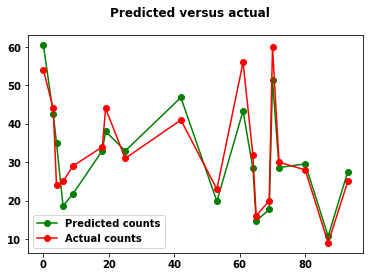

In [28]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Frequency']
fig = plt.figure()
fig.suptitle('Predicted versus actual')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

## Average Error Calculation

In [30]:
sum(abs(predicted_counts-actual_counts)) / 19

4.529676196577779